In [ ]:
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils import data
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision as tv
import PIL
from PIL import Image
import random 
import numpy as np
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor


import os
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [ ]:
from collections import defaultdict
import copy
import random
import os
import shutil
from urllib.request import urlretrieve

import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
project_name = "emotion-detection-triple"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile('./drive/MyDrive/Datasets/archive (2).zip', 'r') as zip_ref:
    zip_ref.extractall(path='./data')

In [ ]:
data_dir = './data'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
['disgust', 'neutral', 'angry', 'fear', 'surprise', 'sad', 'happy']


In [ ]:
happy_files = os.listdir(data_dir + '/train/happy')
sad_files = os.listdir(data_dir + '/train/sad')
angry_files = os.listdir(data_dir + '/train/angry')

In [ ]:
#dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [ ]:
!pip install -q -U albumentations
!echo "$(pip freeze | grep albumentations) is successfully installed"

albumentations==1.2.1 is successfully installed


In [ ]:
class MyImageFolder(Dataset):
    def __init__(self, root_dir, transform=None):
        super(MyImageFolder, self).__init__()
        self.data = []
        self.root_dir = root_dir
        self.transform = transform
        self.class_names = os.listdir(root_dir)

        for index, name in enumerate(self.class_names):
            files = os.listdir(os.path.join(root_dir, name))
            self.data += list(zip(files, [index]*len(files)))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img_file, label = self.data[index]
        root_and_dir = os.path.join(self.root_dir, self.class_names[label])
        image = np.array(Image.open(os.path.join(root_and_dir, img_file)))

        if self.transform is not None:
            augmentations = self.transform(image=image)
            image = augmentations["image"]

        return image, label

In [ ]:
SEED = 42
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
NUM_WORKERS = 4
batch_size=256
PIN_MEMORY = True
LOAD_MODEL = True
LEARNING_RATE = 1e-4
NUM_EPOCHS = 100

train_transforms = A.Compose([
             #albumentations.Resize(48,48),
    A.HorizontalFlip(),
    A.Cutout(2,2,2,0.5),
    A.GaussNoise(),    
    A.Normalize((0.5), (0.5)),
    ToTensorV2(), 
])

val_transforms = A.Compose([
    A.HorizontalFlip(),
    A.Cutout(2,2,2,0.5),
    A.GaussNoise(),    
    #A.Normalize((0.5), (0.5)),
    ToTensorV2(), 
])

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/dropout/cutout.py:52: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  FutureWarning,


In [ ]:
train_ds = MyImageFolder(root_dir="data/train/", transform=train_transforms)
test_ds = MyImageFolder(root_dir="data/test/", transform=val_transforms)

In [ ]:
val_size = 3109
train_size = len(train_ds) - val_size

train_ds, val_ds = random_split(train_ds, [train_size, val_size])
len(train_ds), len(val_ds)

(25600, 3109)

In [ ]:
train_dl = DataLoader(train_ds, batch_size=batch_size, num_workers=NUM_WORKERS,pin_memory=PIN_MEMORY, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, num_workers=NUM_WORKERS,pin_memory=PIN_MEMORY,shuffle=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
for x,y in train_dl:
  print(x.shape)
 # print(len(x))
  #print(y.shape)

torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])
torch.Size([256, 1, 48, 48])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'JpegImageFile'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)


KeyboardInterrupt: ignored

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

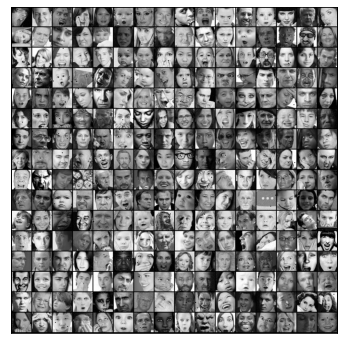

In [ ]:
show_batch(train_dl)

In [ ]:
random_seed = 42
torch.manual_seed(random_seed);

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

In [ ]:
def customtrip(self, anchor, positive, negative):
  distance_positive = (anchor - positive).pow(2).sum(1)  # .pow(.5)
  distance_negative = (anchor - negative).pow(2).sum(1)  # .pow(.5)
  losses = F.relu(distance_positive - distance_negative + self.margin)
  #return losses.mean() if size_average else losses.sum()
  return losses

In [ ]:
import random
import numba
def create_batch(batch,labels):
    images = torch.Tensor(batch)
    x_anchors = torch.zeros((batch_size, 3,48,48))
    x_positives = torch.zeros((batch_size, 3,48,48))
    x_negatives = torch.zeros((batch_size, 3,48,48))
    
    
    for i in range(0, batch_size):
        flag = 0
        # We need to find an anchor, a positive example and a negative example
        random_index = random.randint(0, images.shape[0] - 1)
        
        x_anchor = images[random_index]
        y = labels[random_index]
        
        
        indices_for_pos=  torch.where(labels==y)
        indices_for_pos = torch.stack(indices_for_pos)
        indices_for_pos = torch.squeeze(indices_for_pos)
        indices_for_neg = torch.where(labels != y)
        indices_for_neg = torch.stack(indices_for_neg)
        indices_for_neg = torch.squeeze(indices_for_neg)


        if(indices_for_pos.shape != ()):
          var = indices_for_pos[random.randint(0, len(indices_for_pos) - 1)]
          x_positive = images[var]
        else:
          flag = 1

        if(indices_for_neg.shape != ()):
          x_negative = images[indices_for_neg[random.randint(0, len(indices_for_neg) - 1)]]
        else:
          flag=1
        if(flag!=1):
          x_anchors[i] = x_anchor
          x_positives[i] = x_positive
          x_negatives[i] = x_negative
        
        


    return [x_anchors, x_positives, x_negatives]
    

In [ ]:
def semi_hard(anchor,pos,neg):
  margin = 0.2
  anchor = torch.Tensor(anchor)
  
  disp = torch.square(anchor-pos)
  disp = torch.sum(disp)
  disp = torch.sqrt(disp)

  disn = torch.square(anchor-neg)
  disn = torch.sum(disn)
  disn = torch.sqrt(disn)
  
  #print(disp)
  #print(disn)
  
  if(disp<disn):
    if(disn<disp + margin):
      return True
  return False  

In [ ]:
def create_hard_batch(batch_size, im2, lbls):
    
    
    hard_batches = [] 
    x_anchors = torch.zeros((batch_size, 7))
    x_positives = torch.zeros((batch_size, 7))
    x_negatives = torch.zeros((batch_size, 7))
    
    # Get some random batches
    hard_batches = (create_batch(im2,lbls)) # shape = ([99, 3, 256, 7])
    if(hard_batches):
      hard_batches = torch.stack(hard_batches)
      hard_batches = hard_batches.cuda()
    #hard_batches = torch.stack(hard_batches)
    #print(hard_batches.shape) [3, 256, 7]
      A = (hard_batches[0])
      #print(A.shape) #[256, 7]
      P = (hard_batches[1])
      N = (hard_batches[2])
      #anchor_out  = model(A)
      #positive_out  = model(P)
      #negative_out  = model(N)
      return [A,P,N]
      
    return [x_anchors, x_positives, x_negatives]


In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        im, lbls = batch 
        a=1
        x_anchors = torch.zeros((batch_size, 7))
        x_positives = torch.zeros((batch_size,  7))
        x_negatives = torch.zeros((batch_size,  7))
        if(create_hard_batch(batch_size,im,lbls)):
          Anchor,Positive,Negative=create_hard_batch(batch_size,im,lbls)
          #print(Anchor.shape)
          out1,out2,out3 = self.forward(Anchor,Positive,Negative)
          out1 = out1.view(-1,7)
          out1 = F.log_softmax(out1,dim=-1)
          out2 = out2.view(-1,7)
          out2 = F.log_softmax(out2,dim=-1)
          out3 = out3.view(-1,7)
          out3 = F.log_softmax(out3,dim=-1)
          #print(out1.shape)
          #print(out2.shape)
          #print(out3.shape)
          for i in range(0,batch_size):
            if(semi_hard(out1[i],out2[i],out3[i])):
              x_anchors[i] = out1[0];
              x_positives[i] = out2[1];
              x_negatives[i] = out3[2];
          t=torch.stack([x_anchors,x_positives,x_negatives])
          arr=torch.stack([x_anchors,x_positives,x_negatives])
          triplet_loss = nn.TripletMarginLoss(margin = 0.2,p =  2) # Calculate loss
          loss = triplet_loss(arr[0],arr[1],arr[2])
          return loss
        return 0

    def validation_step(self, batch):
        im, lbls = batch 
        x_anchors = torch.zeros((batch_size, 7))
        x_positives = torch.zeros((batch_size,  7))
        x_negatives = torch.zeros((batch_size,  7))
        if(create_hard_batch(batch_size,im,lbls)):
          Anchor,Positive,Negative=create_hard_batch(batch_size,im,lbls)
          out1,out2,out3 = self.forward(Anchor,Positive,Negative)
          out1 = out1.view(-1,7)
          out1 = F.log_softmax(out1,dim=-1)
          out2 = out2.view(-1,7)
          out2 = F.log_softmax(out2,dim=-1)
          out3 = out3.view(-1,7)
          out3 = F.log_softmax(out3,dim=-1)
          #print(out1.shape)
          #print(out2.shape)
          #print(out3.shape)
          for i in range(0,batch_size):
            if(semi_hard(out1[i],out2[i],out3[i])):
              x_anchors[i] = out1[0];
              x_positives[i] = out2[1]; 
              x_negatives[i] = out3[2];
          t=torch.stack([x_anchors,x_positives,x_negatives])
          arr=torch.stack([x_anchors,x_positives,x_negatives])
          triplet_loss = nn.TripletMarginLoss(margin = 0.2,p =  2) # Calculate loss
          loss = triplet_loss(arr[0],arr[1],arr[2])
          #print(lbls.shape)
          #acc1 = accuracy(out1, lbls)   
          #acc2=accuracy(out2,lbls)
          #acc3=accuracy(out3,lbls)
          #acc=(acc1+acc2+acc3)/3
                      # Calculate accuracy
          return {'val_loss': loss.detach()}#, 'val_acc': acc}
        return 0 
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        #batch_accs = [x['val_acc'] for x in outputs]
        #epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item()}# 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss']))
        
def accuracy(outputs, labels):   
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class ferCnnModel(ImageClassificationBase):
    def __init__(self):
        super(ferCnnModel, self).__init__()
        self.convblock1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3,padding=1,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, kernel_size=3,padding=1,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2), # output: 64 x 24 x 24
        
       
            nn.Conv2d(64, 128, kernel_size=3,padding=1,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            # nn.Dropout(dropout_value)            
         
        
            nn.Conv2d(128,256,kernel_size=3,padding=1,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(256),
   

        
            nn.Conv2d(256,512, kernel_size=1,padding=1,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            # nn.Dropout(dropout_value)            
       

            # TRANSITION BLOCK 2
            nn.MaxPool2d(2, 2), # output_size = 12 RF=20

            # CONVOLUTION BLOCK 2
            
            nn.Conv2d(512, 1024, kernel_size=3,padding=1,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(1024),
            # nn.Dropout(dropout_value)            
       

       
            nn.Conv2d(1024,1024, kernel_size=3,padding=1,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(1024),
            # nn.Dropout(dropout_value)              
            nn.MaxPool2d(2, 2), # output_size =6 RF=32

            
            nn.Conv2d(1024,512, kernel_size=3,padding=1,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(512),
             # nn.Dropout(dropout_value)            
         

        
            nn.Conv2d(512,256, kernel_size=3,padding=0,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(256),
             # nn.Dropout(dropout_value)            
            nn.AvgPool2d(kernel_size=4),
            nn.Conv2d(256,7, kernel_size=1,padding=0,bias=False)
        ) 
            

     
    def forward(self,input1,input2,input3):
        output1=self.forward_once(input1)
        output2=self.forward_once(input2)
        output3=self.forward_once(input3)
        return output1,output2,output3


    def forward_once(self, x):
      x = self.convblock1(x)
      x = x.view(-1, 7)
      return F.log_softmax(x, dim=-1)        

In [ ]:
torch.cuda.empty_cache()

In [ ]:
model = ferCnnModel()  
to_device(model,device)

ferCnnModel(
  (convblock1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (8): ReLU()
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (11): ReLU()
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1), bias=False)
    (14): 

In [ ]:
#torch.cuda.memory_summary(device, abbreviated=False)

In [ ]:
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        
        for batch in train_loader:
            loss = model.training_step(batch)
            #print(loss)
            #if(loss!="loss"):
            train_losses.append(loss)
            if(loss.requires_grad):
              loss.backward()
              optimizer.step()
              optimizer.zero_grad()
            #else:
              
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
evaluate(model, val_dl)

{'val_loss': 0.19910040497779846}

In [ ]:
num_epochs = 20
opt_func = torch.optim.SGD
lr = 0.001
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

In [ ]:
def plot_accuracies(history):
    #accuracies = [x['val_acc'] for x in history]
    #plt.plot(accuracies, '-x')
    #plt.xlabel('epoch')
    #plt.ylabel('accuracy')
    #plt.title('Accuracy vs. No. of epochs');

In [ ]:
#plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history)